<a href="https://colab.research.google.com/github/yoon777/cv_project/blob/main/data_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-kor
!pip install pytesseract
!pip install PyPDF2
!pip install camelot-py[base]
!pip install easyocr
!pip install pdfplumber

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,776 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [28]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pytesseract
import PyPDF2
import camelot

In [29]:
# 구글 드라이브
from google.colab import drive
drive.mount('/content/drive')
image_dir = '/content/drive/MyDrive/CV_project/train_raw'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# vscode
# image_dir = 'C:/Users/Yoon/Yoon/2024/BITAMIN/2nd_session/CV_project/032.표_이미지-텍스트_쌍_데이터/조합표/train_raw'

6066
/content/drive/MyDrive/CV_project/train_raw/T02_C01_61002_1589_060.jpg


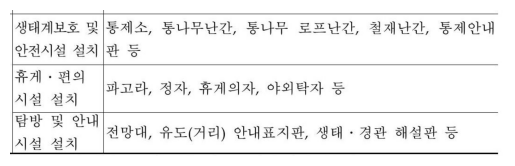

In [31]:
# 이미지 파일 리스트 불러오기
image_files = [f for f in os.listdir(image_dir) if f.startswith('T02_C01') and f.endswith('.jpg')]

print(len(image_files))

# 첫 번째 이미지 불러오기
first_image_path = os.path.join(image_dir, image_files[0])
print(first_image_path)
image = Image.open(first_image_path)

# 이미지 출력
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()

In [32]:
# 이미지 파일 리스트 불러오기
image_files = [f for f in os.listdir(image_dir) if f.startswith('T02_C01') and f.endswith('.jpg')]

# 이미지 크기 정보를 저장할 리스트
widths = []
heights = []

# 이미지 개수
total_images = len(image_files)

# 이미지 크기 비교 및 업데이트
for i, image_file in enumerate(tqdm(image_files)):
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)

    height, width = img.size

    widths.append(width)
    heights.append(height)

  1%|          | 63/6066 [00:06<10:58,  9.11it/s]


KeyboardInterrupt: 

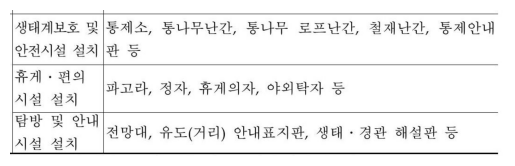

                                     text  xmin  xmax  ymin  ymax
0                           (생태계보호 및 통제소,     5   303    17    61
1                                  통나무난간    319   483    19    61
2                                     통나무   499   597    19    61
3                                  로프난간 ,   612   744    23    61
4                                  철재난간 ,   757   895    21    61
5                                    통제안내   909  1037    19    61
6                         (안전시설 설치 |판   등     4   283    66   110
7                                 휴게 . 편의     9   163   125   165
8               파고라   정자   휴게 의자  야외탁자  등   201   717   146   189
9                                 시설   설치     5   149   173   213
10                              담방   및 안내     7   193   217   257
11  전망대 ,  유도(거리) 안내표지판   생태 . 경관   해설판 등   199   959   240   285
12                                  시설 설치     7   149   269   305


In [33]:
import easyocr
import pandas as pd

# 이미지 읽기
img_path = os.path.join(image_dir, image_files[0])  # 첫 번째 이미지 선택
img = Image.open(img_path)  # PIL 이미지로 열기

# 이미지 출력 (원본 이미지 시각화)
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

# OCR 모델 초기화 (한국어 및 영어 지원)
reader = easyocr.Reader(['ko', 'en'])

# 이미지에서 텍스트 및 좌표 추출
results = reader.readtext(img)

# 좌표와 텍스트를 데이터프레임으로 변환
data = []
for (bbox, text, confidence) in results:
    # bbox는 좌표 정보, text는 인식된 텍스트
    (top_left, top_right, bottom_right, bottom_left) = bbox
    xmin = min(top_left[0], bottom_left[0])
    xmax = max(top_right[0], bottom_right[0])
    ymin = min(top_left[1], top_right[1])
    ymax = max(bottom_left[1], bottom_right[1])

    # 좌표와 텍스트 정보를 저장
    data.append({
        'text': text,
        'xmin': xmin,
        'xmax': xmax,
        'ymin': ymin,
        'ymax': ymax
    })

df = pd.DataFrame(data)
print(df)


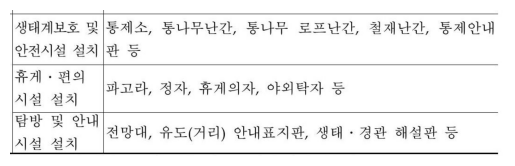

In [34]:
# 이미지 출력
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

In [38]:
from PIL import Image
import io
import camelot
import PyPDF2

# 이미지 파일 열기
image = Image.open(image_path)

# PDF 파일로 저장할 경로 설정
pdf_file_path = 'temp.pdf'

# 이미지 PDF로 저장
image.save(pdf_file_path, 'PDF', resolution=100.0)

# Camelot으로 PDF에서 테이블 읽기
tables = camelot.read_pdf('/content/temp.pdf', pages='1')  # 페이지 범위 지정 가능

# 읽은 테이블 출력
for i, table in enumerate(tables):
    print(f"Table {i+1}:")
    print(table.df)  # 각 테이블을 데이터프레임 형식으로 출력

# PDF 파일에서 텍스트 읽기 (필요한 경우)
with open(pdf_file_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    for page_number in range(len(reader.pages)):
        text = reader.pages[page_number].extract_text()
        print(f"Page {page_number + 1}:")
        print(text)

DeprecationError: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.

In [40]:
from PIL import Image
import pdfplumber

# PDF 파일로 저장할 경로 설정
pdf_file_path = '/content/temp.pdf'

# 이미지 파일 열기 및 PDF로 저장
image = Image.open(image_path)
image.save('/content/temp.pdf', 'PDF', resolution=100.0)

# pdfplumber로 PDF에서 테이블 읽기
with pdfplumber.open(pdf_file_path) as pdf:
  for page_number in range(len(pdf.pages)):
    page = pdf.pages[page_number]
    # 테이블 추출
    tables = page.extract_tables()

    # 각 테이블 출력
    for i, table in enumerate(tables):
      print(f"Table {i+1} on Page {page_number + 1}:")
      for row in table:
        print(row)  # 각 행을 출력

In [44]:
with pdfplumber.open(pdf_file_path) as pdf:
  print(pdf.pages[page_number])
  print(page.extract_tables())

<Page:1>


AttributeError: 'PDF' object has no attribute 'extract_tables'